In [5]:
import sys
from pathlib import Path

ROOT = Path().resolve().parents[1]
sys.path.append(str(ROOT))

In [6]:
from src.spp_toy.env import Bay, BayPair, ContainerSpec
from src.spp_toy.vis import visualize_baypair_with_containers
from src.spp_toy.locate import stow_by_block_mismatch_then_paired

In [ ]:
block_total_cols = {1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3}
block_tiers = {1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4}
hold_blocks = {4, 5, 6}

valid_local_cols_by_tier = {
    4: {3: [0, 1, 2], 2: [1, 2], 1: [2], 0: []},
    5: {3: [0, 1, 2], 2: [0, 1, 2], 1: [0, 1, 2], 0: [0, 1, 2]},
    6: {3: [0, 1, 2], 2: [0, 1], 1: [0], 0: []},
}

valid_local_cols_by_tier_bay29 = {
    4: {3: [0, 1, 2], 2: [1, 2], 1: [2], 0: []},
    5: {3: [0, 1, 2], 2: [0, 1, 2], 1: [0, 1, 2], 0: [0, 1, 2]},
    6: {3: [0, 1, 2], 2: [0, 1], 1: [0], 0: []},
}

valid_local_cols_by_tier_bay31 = {
    4: {3: [1, 2], 2: [2], 1: [], 0: []},
    5: {3: [0, 1, 2], 2: [0, 1, 2], 1: [0, 1, 2], 0: [1]},
    6: {3: [0, 1], 2: [0], 1: [], 0: []},
}

bay29 = Bay(
    name="Bay29",
    block_total_cols=block_total_cols,
    block_tiers=block_tiers,
    hold_valid_cols_by_tier=valid_local_cols_by_tier_bay29,
    hold_blocks=hold_blocks,
    deck_blocks={1, 2, 3},
)

bay31 = Bay(
    name="Bay31",
    block_total_cols=block_total_cols,
    block_tiers=block_tiers,
    hold_valid_cols_by_tier=valid_local_cols_by_tier_bay31,
    hold_blocks=hold_blocks,
    deck_blocks={1, 2, 3},
)
bay30 = BayPair(bay29, bay31)

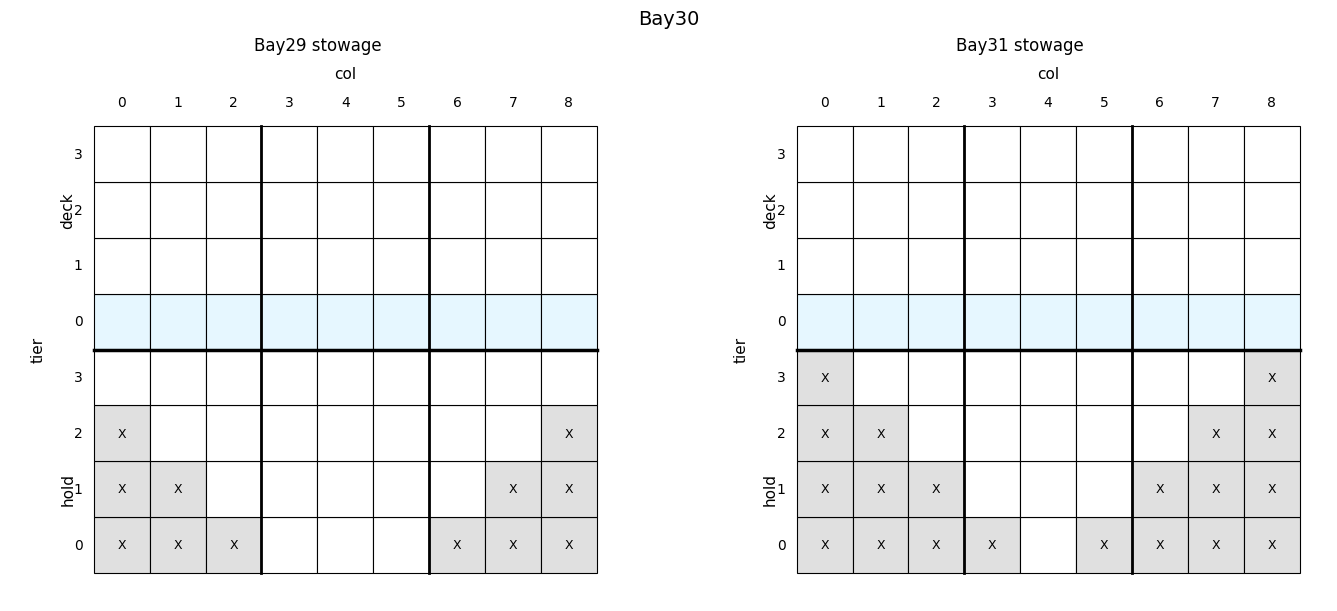

In [3]:
visualize_baypair_with_containers(bay30, pair_name="Bay30", left_name="Bay29", right_name="Bay31")

In [4]:
bay29_block_lists = {
    1: [
        ContainerSpec("P401", 40, True, "full"),
        ContainerSpec("P402", 40, False, "empty"),
        ContainerSpec("L1A", 20, True, "full"),
        ContainerSpec("L1B", 20, False, "empty"),
        ContainerSpec("P403", 40, True, "empty"),
        ContainerSpec("P404", 40, False, "full"),
        ContainerSpec("L1C", 20, False, "full"),
        ContainerSpec("L1D", 20, False, "full"),
        ContainerSpec("L1E", 20, False, "empty"),
    ],
    2: [
        ContainerSpec("P420", 40, False, "full"),
        ContainerSpec("P421", 40, True, "empty"),
        ContainerSpec("P422", 40, False, "full"),
        ContainerSpec("P423", 40, True, "empty"),
        ContainerSpec("P424", 40, False, "full"),
        ContainerSpec("P425", 40, False, "empty"),
        ContainerSpec("L2A", 40, False, "empty"),
        ContainerSpec("L2B", 20, False, "full"),
        ContainerSpec("L3C", 20, False, "full"),
        ContainerSpec("L2D", 20, False, "empty"),
        ContainerSpec("L3E", 20, False, "empty"),
    ],
    3: [
        ContainerSpec("P430", 40, False, "empty"),
        ContainerSpec("P431", 40, False, "full"),
        ContainerSpec("P432", 40, True, "empty"),
        ContainerSpec("P433", 40, False, "empty"),
        ContainerSpec("L3B", 40, True, "full"),
        ContainerSpec("L3A", 20, True, "full"),
        ContainerSpec("L3G", 20, False, "empty"),
        ContainerSpec("L3C", 20, False, "empty"),
        ContainerSpec("L3D", 20, False, "full"),
        # ContainerSpec("L3E",  20, False,  "full"),
        # ContainerSpec("L3F",  20, False,  "empty"),
    ],
    4: [
        ContainerSpec("P440", 20, False, "full"),
        ContainerSpec("P441", 40, False, "empty"),
        ContainerSpec("P442", 20, False, "full"),
        ContainerSpec("L4A", 20, False, "empty"),
        ContainerSpec("L4B", 40, False, "full"),
        ContainerSpec("L5B", 20, False, "empty"),
    ],
    5: [
        ContainerSpec("P450", 40, False, "full"),
        ContainerSpec("P451", 40, False, "full"),
        ContainerSpec("P452", 40, False, "empty"),
        ContainerSpec("P453", 40, False, "empty"),
        ContainerSpec("P454", 40, False, "empty"),
        ContainerSpec("L5A", 20, False, "empty"),
        ContainerSpec("L5B", 40, False, "full"),
        ContainerSpec("L5C", 20, False, "full"),
        ContainerSpec("L5D", 20, False, "full"),
        ContainerSpec("L5E", 20, False, "empty"),
        ContainerSpec("L5F", 20, False, "empty"),
        ContainerSpec("L5G", 20, False, "empty"),
    ],
    6: [
        # ContainerSpec("P460", 20, False, "full"),
        ContainerSpec("P461", 40, False, "empty"),
        ContainerSpec("L6A", 20, False, "empty"),
        ContainerSpec("L6B", 40, False, "full"),
        ContainerSpec("L6C", 20, False, "full"),
        ContainerSpec("L6D", 20, False, "full"),
        ContainerSpec("L6E", 20, False, "empty"),
    ],
}

bay31_block_lists = {
    1: [
        ContainerSpec("P401", 40, True, "full"),
        ContainerSpec("P402", 40, False, "empty"),
        ContainerSpec("R1A", 20, True, "empty"),
        ContainerSpec("R1B", 20, False, "full"),
        ContainerSpec("P403", 40, True, "empty"),
        ContainerSpec("P404", 40, False, "full"),
        ContainerSpec("R1C", 20, False, "full"),
        # ContainerSpec("R1D",  20, False,  "full"),
        # ContainerSpec("R1E",  20, False, "full"),
        # ContainerSpec("R1F",  20, False,  "empty"),
        ContainerSpec("R1G", 20, False, "empty"),
        ContainerSpec("R1H", 20, False, "empty"),
    ],
    2: [
        ContainerSpec("P420", 40, False, "full"),
        ContainerSpec("P421", 40, True, "empty"),
        ContainerSpec("P422", 40, False, "full"),
        ContainerSpec("P423", 40, True, "empty"),
        ContainerSpec("P424", 40, False, "full"),
        ContainerSpec("P425", 40, False, "empty"),
        ContainerSpec("L2A", 40, False, "empty"),
        ContainerSpec("R2A", 20, False, "empty"),
        ContainerSpec("R2B", 20, True, "empty"),
        ContainerSpec("R2C", 20, False, "full"),
        ContainerSpec("R2D", 20, False, "full"),
        # ContainerSpec("R2E",  20, False, "full"),
    ],
    3: [
        ContainerSpec("P430", 40, False, "empty"),
        ContainerSpec("P431", 40, False, "full"),
        ContainerSpec("P432", 40, True, "empty"),
        ContainerSpec("P433", 40, False, "empty"),
        ContainerSpec("L3B", 40, True, "full"),
        ContainerSpec("R3A", 20, False, "full"),
        ContainerSpec("R3B", 20, False, "full"),
        ContainerSpec("R3C", 20, False, "empty"),
        ContainerSpec("R3D", 20, False, "full"),
    ],
    4: [
        ContainerSpec("P441", 40, False, "empty"),
        ContainerSpec("R4A", 20, False, "empty"),
        ContainerSpec("L4B", 40, False, "full"),
    ],
    5: [
        ContainerSpec("P450", 40, False, "full"),
        ContainerSpec("P451", 40, False, "full"),
        ContainerSpec("P452", 40, False, "empty"),
        ContainerSpec("P453", 40, False, "empty"),
        ContainerSpec("P454", 40, False, "empty"),
        ContainerSpec("R5A", 20, False, "empty"),
        ContainerSpec("L5B", 40, False, "full"),
        ContainerSpec("R5C", 20, False, "empty"),
        ContainerSpec("R5D", 20, False, "full"),
        ContainerSpec("R5E", 20, False, "empty"),
    ],
    6: [
        ContainerSpec("P461", 40, False, "empty"),
        ContainerSpec("R6A", 20, False, "full"),
        ContainerSpec("L6B", 40, False, "full"),
    ],
}

In [5]:
stow_by_block_mismatch_then_paired(bay30, bay29_block_lists, bay31_block_lists)

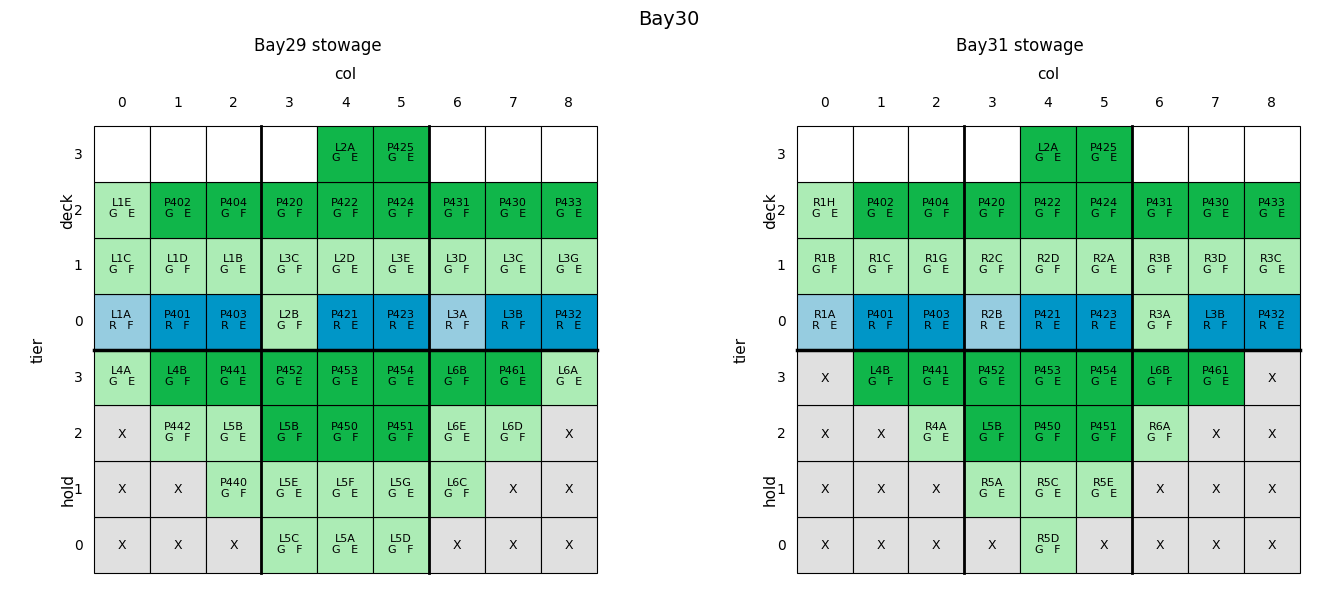

In [6]:
visualize_baypair_with_containers(bay30, pair_name="Bay30", left_name="Bay29", right_name="Bay31")